In [68]:
from glob import glob
import re
from matplotlib import pyplot as plt

In [14]:
error_file_lines = dict()
for error_file in glob('../data/err_*.log'):
    year = error_file.split('_')[1].split('.')[0]
    with open(error_file) as f:
        error_file_lines[year] = list(f)

In [28]:
def split_lines(lines):
    progress_lines = []
    skipping_cached_lines = []
    skipping_error_lines = []
    other_lines = []
    for l in lines:
        if 'Estimated' in l:
            progress_lines.append(l)
        elif ('Skipping' in l) and ('cached' in l):
            skipping_cached_lines.append(l)
        elif ('Skipping' in l) and ('Error') in l:
            skipping_error_lines.append(l)
        else:
            other_lines.append(l)
    assert len(other_lines) == 2
    return progress_lines, skipping_cached_lines, skipping_error_lines

In [29]:
progress_lines_19, cached_lines_19, error_lines_19 = split_lines(error_file_lines['19'])
progress_lines_20, cached_lines_20, error_lines_20 = split_lines(error_file_lines['20'])
progress_lines_21, cached_lines_21, error_lines_21 = split_lines(error_file_lines['21'])

In [30]:
def file_num_vs_time_left(progress_lines):
    n = []
    etas = []
    for l in progress_lines:
        match = re.match('^([0-9]+)/.+in: ([0-9]+\.[0-9]+) hours.+$', l)
        if match:
            i, eta = match.groups()
            n.append(int(i))
            etas.append(float(eta))
    plt.scatter(n, etas)

### Progress

In [87]:
[len(starts) for starts in [progress_lines_19, progress_lines_20, progress_lines_21]]

[4035, 247, 747]

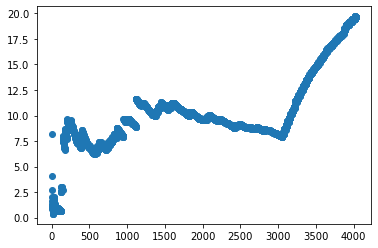

In [31]:
file_num_vs_time_left(progress_lines_19)

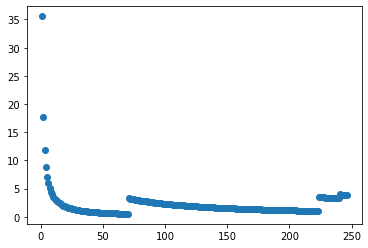

In [32]:
file_num_vs_time_left(progress_lines_20)

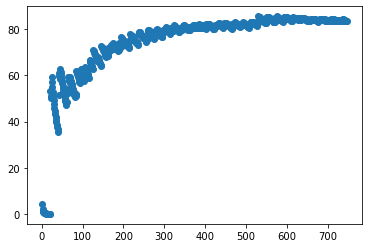

In [33]:
file_num_vs_time_left(progress_lines_21)

### Errors

In [70]:
def files_by_error(error_lines):
    out = dict()
    for l in error_lines:
        match = re.match('^Skipping (.+) because.+Error \[(.+)\].*$', l)
        if match:
            file, err = match.groups()
            if out.get(err):
                out[err].append(file)
            else:
                out[err] = [file]
    return out

In [71]:
[print(i) for i in files_by_error(error_lines_19).keys()]

java.util.zip.ZipException: invalid stored block lengths
java.util.zip.ZipException: too many length or distance symbols
java.util.zip.ZipException: invalid literal/length code
java.util.zip.ZipException: invalid block type
java.util.zip.ZipException: invalid distance code
java.util.zip.ZipException: invalid code lengths set
java.io.EOFException: Unexpected end of ZLIB input stream
java.util.zip.ZipException: Corrupt GZIP trailer


[None, None, None, None, None, None, None, None]

In [72]:
[print(i) for i in files_by_error(error_lines_20).keys()]

java.util.zip.ZipException: invalid stored block lengths
java.util.zip.ZipException: invalid block type
java.util.zip.ZipException: invalid distance code


[None, None, None]

In [73]:
[print(i) for i in files_by_error(error_lines_21).keys()]

java.util.zip.ZipException: invalid code lengths set
java.util.zip.ZipException: invalid block type
java.util.zip.ZipException: too many length or distance symbols
java.util.zip.ZipException: invalid distance code
java.util.zip.ZipException: invalid stored block lengths
java.io.EOFException: Unexpected end of ZLIB input stream


[None, None, None, None, None, None]

In [74]:
errored_files = [f 
 for el in [error_lines_19, error_lines_20, error_lines_21] 
 for fs in files_by_error(el).values() 
 for f in fs]

In [78]:
errors_per_year = [(lab, len([f for fs in files_by_error(el).values() for f in fs]))
 for lab, el in [(19, error_lines_19), (20, error_lines_20), (21, error_lines_21)] ]
errors_per_year

[(19, 194), (20, 3), (21, 19)]

In [79]:
sum([a[1] for a in errors_per_year])

216

### Cached

In [81]:
cached_lines_19

['Skipping /nfs/data/webdatacommons/2019/dpef.html-microdata.nq-02301.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-microdata.nq-00759.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-microdata.nq-02263.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-embedded-jsonld.nq-00819.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-embedded-jsonld.nq-00556.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-embedded-jsonld.nq-01021.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-microdata.nq-04149.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-embedded-jsonld.nq-01143.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-mf-hcard.nq-00116.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.html-mf-hcard.nq-01503.gz because cached.\n',
 'Skipping /nfs/data/webdatacommons/2019/dpef.ht

In [82]:
def cached_files(cache_lines):
    out = list()
    for l in cache_lines:
        match = re.match('^Skipping (.+) because.*$', l)
        if match:
            file = match.groups()
            out.append(file)
    return out

In [91]:
import pandas as pd
pd.DataFrame({
'start': [len(starts) for starts in [progress_lines_19, progress_lines_20, progress_lines_21]],
'cached': [len(cached_files(caches)) for caches in [cached_lines_19, cached_lines_20, cached_lines_21]]
}, index=['2019', '2020', '2021'])

,start,cached
2019,4035,2899
2020,247,242
2021,747,16
